<a href="https://colab.research.google.com/github/Debojyoti-Chanda/Fraud-Detection-Model/blob/main/Anti_Money_Laundering_Transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Assuming your data is in a CSV file named 'data.csv'
# Replace 'data.csv' with your actual file name
try:
  df = pd.read_csv('SAML-D.csv')
  print(df.head()) # Display the first few rows of the DataFrame
except FileNotFoundError:
  print("Error: 'data.csv' not found. Please upload the file or provide the correct path.")
except pd.errors.ParserError:
  print("Error: Could not parse the CSV file. Please check its format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


       Time        Date  Sender_account  Receiver_account    Amount  \
0  10:35:19  2022-10-07      8724731955        2769355426   1459.15   
1  10:35:20  2022-10-07      1491989064        8401255335   6019.64   
2  10:35:20  2022-10-07       287305149        4404767002  14328.44   
3  10:35:21  2022-10-07      5376652437        9600420220  11895.00   
4  10:35:21  2022-10-07      9614186178        3803336972    115.25   

  Payment_currency Received_currency Sender_bank_location  \
0        UK pounds         UK pounds                   UK   
1        UK pounds            Dirham                   UK   
2        UK pounds         UK pounds                   UK   
3        UK pounds         UK pounds                   UK   
4        UK pounds         UK pounds                   UK   

  Receiver_bank_location  Payment_type  Is_laundering       Laundering_type  
0                     UK  Cash Deposit              0  Normal_Cash_Deposits  
1                    UAE  Cross-border            

In [3]:
df.columns

Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type'],
      dtype='object')

In [4]:
print(df.info()) # Detailed info about the DataFrame (data types, non-null values, memory usage)
print(df.describe()) # Summary statistics for numerical columns
print(df.shape) # Number of rows and columns
print(df.dtypes) # Data types of each column
print(df.isnull().sum()) # Number of missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB
None
       Sender_account  Receiver_account        Amount  Is_laundering
count    9.504852e+06      9.504852e+06  9.504852e+06   9.504852e+06
mean     5.006619e+09      5.006006e+09  8.762968e+03   1.038733e-03
std      2.885814e+09      2.884763e+09  2.561495e+04   3.221263e-02
min      9.018000e+03   

In [6]:
# prompt: find all the rows where Is_laundering  is 1
import pandas as pd
laundering_rows = df[df['Is_laundering'] == 1]
print(laundering_rows)

             Time        Date  Sender_account  Receiver_account        Amount  \
317      10:46:37  2022-10-07      7401327478        4336451277   2603.300000   
1206     11:19:32  2022-10-07      6340007440        4316483340    106.040000   
1649     11:35:42  2022-10-07      3758118046        6081504025   5903.330000   
1954     11:45:53  2022-10-07       445154846        4497771501   3957.870000   
3304     12:39:03  2022-10-07      2758469152        2987279234   7832.410000   
...           ...         ...             ...               ...           ...   
9499725  07:56:34  2023-08-23      6347914836        8661825378   6702.170000   
9501820  09:12:18  2023-08-23      9285879778           7750754    814.490000   
9501946  09:16:07  2023-08-23       351184098        4257557167   7888.580000   
9503705  10:18:07  2023-08-23      7929569569        8236488006  30061.133364   
9504744  10:53:52  2023-08-23      2346864590        2116866170   1436.690000   

        Payment_currency Re

In [12]:
#  Group by country and calculate the percentage for each
country_percentages_sender = df.groupby('Sender_bank_location')['Is_laundering'].value_counts(normalize=True) * 100
print("\nPercentage of laundering transactions per country:")
country_percentages_sender


Percentage of laundering transactions per country:


Sender_bank_location  Is_laundering
Albania               0                99.841342
                      1                 0.158658
Austria               0                99.789474
                      1                 0.210526
France                0                99.834242
                      1                 0.165758
Germany               0                99.776728
                      1                 0.223272
India                 0                99.761309
                      1                 0.238691
Italy                 0                99.761842
                      1                 0.238158
Japan                 0                99.794239
                      1                 0.205761
Mexico                0                99.750878
                      1                 0.249122
Morocco               0                99.701687
                      1                 0.298313
Netherlands           0                99.755516
                      1                 0.244484
Nigeria               0                99.875169
                      1                 0.124831
Pakistan              0                99.877126
                      1                 0.122874
Spain                 0                99.860760
                      1                 0.139240
Switzerland           0                99.800029
                      1                 0.199971
Turkey                0                99.870826
                      1                 0.129174
UAE                   0                99.830686
                      1                 0.169314
UK                    0                99.899239
                      1                 0.100761
USA                   0                99.810795
                      1                 0.189205
Name: proportion, dtype: float64

In [18]:
country_percentages_sender = df.groupby('Sender_bank_location')['Is_laundering'].apply(lambda x: (x == 1).sum() / len(x) * 100)
print("\nPercentage of laundering transactions per country (Receiver):")
print(country_percentages_sender)


Percentage of laundering transactions per country (Receiver):
Sender_bank_location
Albania        0.158658
Austria        0.210526
France         0.165758
Germany        0.223272
India          0.238691
Italy          0.238158
Japan          0.205761
Mexico         0.249122
Morocco        0.298313
Netherlands    0.244484
Nigeria        0.124831
Pakistan       0.122874
Spain          0.139240
Switzerland    0.199971
Turkey         0.129174
UAE            0.169314
UK             0.100761
USA            0.189205
Name: Is_laundering, dtype: float64


In [19]:
country_percentages_sender_sorted = country_percentages_sender.sort_values(ascending=False)
print("\nPercentage of laundering transactions per country (Receiver - Sorted):")
country_percentages_sender_sorted


Percentage of laundering transactions per country (Receiver - Sorted):


,Is_laundering
Sender_bank_location,
Morocco,0.298313
Mexico,0.249122
Netherlands,0.244484
India,0.238691
Italy,0.238158
Germany,0.223272
Austria,0.210526
Japan,0.205761
Switzerland,0.199971


In [9]:
laundering_rows

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
317,10:46:37,2022-10-07,7401327478,4336451277,2603.300000,UK pounds,UK pounds,UK,UK,Cash Deposit,1,Smurfing
1206,11:19:32,2022-10-07,6340007440,4316483340,106.040000,UK pounds,Indian rupee,UK,India,Cash Withdrawal,1,Cash_Withdrawal
1649,11:35:42,2022-10-07,3758118046,6081504025,5903.330000,UK pounds,Mexican Peso,UK,Mexico,Cross-border,1,Behavioural_Change_2
1954,11:45:53,2022-10-07,445154846,4497771501,3957.870000,UK pounds,Naira,UK,Nigeria,Cross-border,1,Structuring
3304,12:39:03,2022-10-07,2758469152,2987279234,7832.410000,UK pounds,UK pounds,UK,UK,Debit card,1,Structuring
...,...,...,...,...,...,...,...,...,...,...,...,...
9499725,07:56:34,2023-08-23,6347914836,8661825378,6702.170000,UK pounds,US dollar,UK,USA,Cross-border,1,Layered_Fan_In
9501820,09:12:18,2023-08-23,9285879778,7750754,814.490000,UK pounds,Euro,UK,Austria,Cross-border,1,Behavioural_Change_1
9501946,09:16:07,2023-08-23,351184098,4257557167,7888.580000,UK pounds,Turkish lira,UK,Turkey,Cross-border,1,Behavioural_Change_2
9503705,10:18:07,2023-08-23,7929569569,8236488006,30061.133364,UK pounds,UK pounds,UK,UK,Credit card,1,Cycle


In [15]:
#  Group by country and calculate the percentage for each
country_percentages_reciever = df.groupby('Receiver_bank_location')['Is_laundering'].value_counts(normalize=True) * 100
print("\nPercentage of laundering transactions per country:")
country_percentages_reciever


Percentage of laundering transactions per country:


Receiver_bank_location  Is_laundering
Albania                 0                99.394064
                        1                 0.605936
Austria                 0                99.603542
                        1                 0.396458
France                  0                99.787079
                        1                 0.212921
Germany                 0                99.735340
                        1                 0.264660
India                   0                99.629088
                        1                 0.370912
Italy                   0                99.641263
                        1                 0.358737
Japan                   0                99.785690
                        1                 0.214310
Mexico                  0                99.486779
                        1                 0.513221
Morocco                 0                99.346321
                        1                 0.653679
Netherlands             0                99.603366
                        1                 0.396634
Nigeria                 0                99.344168
                        1                 0.655832
Pakistan                0                99.566444
                        1                 0.433556
Spain                   0                99.766681
                        1                 0.233319
Switzerland             0                99.786591
                        1                 0.213409
Turkey                  0                99.502613
                        1                 0.497387
UAE                     0                99.456779
                        1                 0.543221
UK                      0                99.917560
                        1                 0.082440
USA                     0                99.763908
                        1                 0.236092
Name: proportion, dtype: float64

In [14]:
# Group by country and calculate the percentage for each
country_percentages_receiver = df.groupby('Receiver_bank_location')['Is_laundering'].apply(lambda x: (x == 1).sum() / len(x) * 100)
print("\nPercentage of laundering transactions per country (Receiver):")
print(country_percentages_receiver)



Percentage of laundering transactions per country (Receiver):
Receiver_bank_location
Albania        0.605936
Austria        0.396458
France         0.212921
Germany        0.264660
India          0.370912
Italy          0.358737
Japan          0.214310
Mexico         0.513221
Morocco        0.653679
Netherlands    0.396634
Nigeria        0.655832
Pakistan       0.433556
Spain          0.233319
Switzerland    0.213409
Turkey         0.497387
UAE            0.543221
UK             0.082440
USA            0.236092
Name: Is_laundering, dtype: float64


In [16]:
country_percentages_receiver_sorted = country_percentages_receiver.sort_values(ascending=False)
print("\nPercentage of laundering transactions per country (Receiver - Sorted):")
country_percentages_receiver_sorted


Percentage of laundering transactions per country (Receiver - Sorted):


,Is_laundering
Receiver_bank_location,
Nigeria,0.655832
Morocco,0.653679
Albania,0.605936
UAE,0.543221
Mexico,0.513221
Turkey,0.497387
Pakistan,0.433556
Netherlands,0.396634
Austria,0.396458


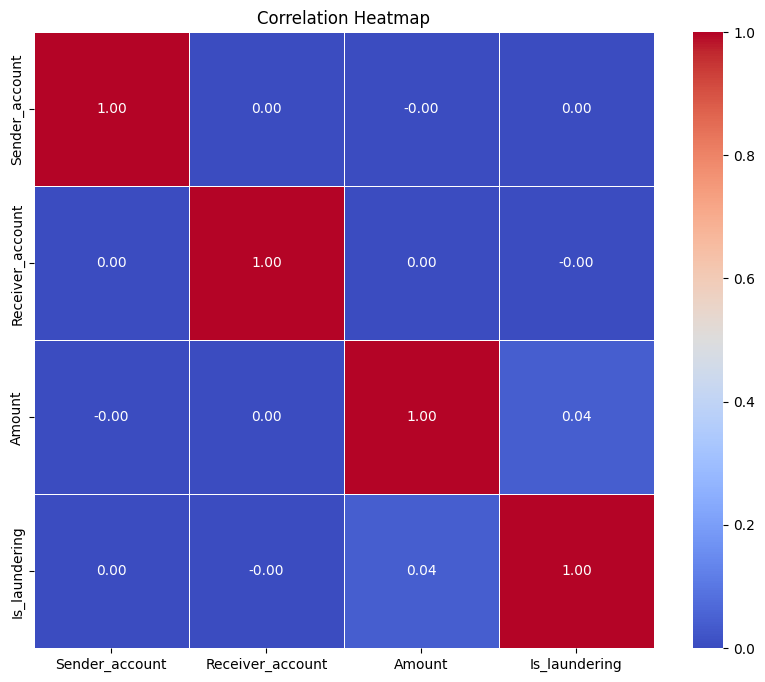

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


categorical_cols = ['Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Laundering_type']

# Create a LabelEncoder for each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoders for later use (if needed)

In [25]:
df


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,10,10,16,16,1,0,11
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,10,1,16,15,5,0,14
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,10,10,16,16,3,0,20
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,10,10,16,16,0,0,13
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,10,10,16,16,1,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,10,10,16,16,0,0,20
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,10,10,16,16,6,0,20
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,10,10,16,16,0,0,20
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,10,10,16,16,0,0,13


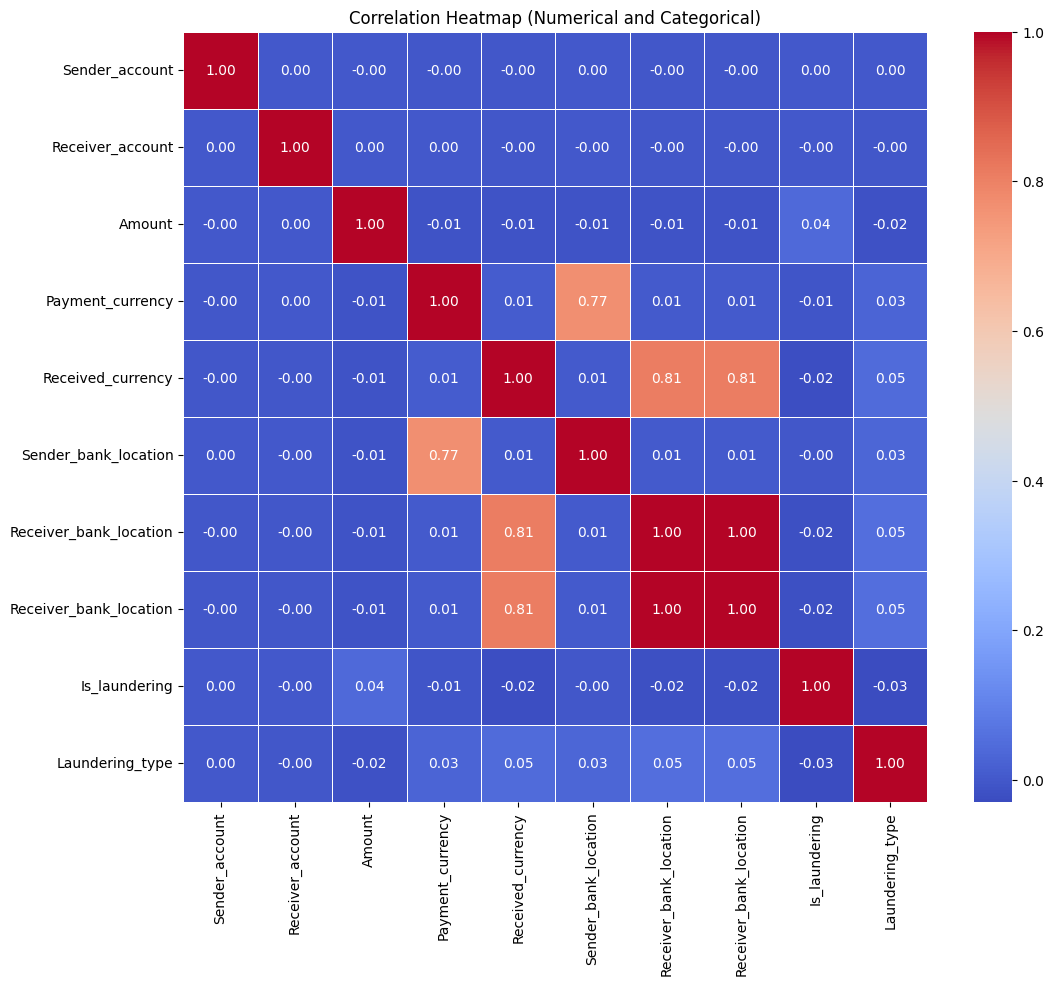

In [26]:
# Calculate the correlation matrix
needed_columns = ['Sender_account','Receiver_account', 'Amount','Payment_currency','Received_currency', 'Sender_bank_location','Receiver_bank_location'	, 'Receiver_bank_location', 'Is_laundering'	, 'Laundering_type']
correlation_matrix = df[needed_columns].corr()  # You might need to select specific columns

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical and Categorical)")
plt.show()